In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,classification_report
df = pd.read_csv('credit_risk_dataset.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
print("Number of columns: {}".format(len(df.columns.tolist())))
print(df.columns)

Number of columns: 12
Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.shape

(32581, 12)

In [6]:
df.describe()
#df.describe(include=['int64','float64'])

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [4]:
cat_col = [col for col in df.columns if df[col].dtype =='object']
cat_col
df[cat_col].nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

In [8]:
for col in cat_col:
    print(df[col].value_counts())

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


In [9]:
num_cols = [col for col in df.select_dtypes(include=['number'])]
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [10]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
round((df.isnull().sum()/df.shape[0]*100),2)

person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.75
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

In [12]:
df1 = df['person_emp_length']
ser = df1.isna()
ind=[]
'''for idx,res in enumerate(ser):
    if res == True:
        ind.append(ser.index[idx])'''
#drop rows containing nan values
df1.dropna(how='any')
df1.isna().sum()
df['person_emp_length'] = df1
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [13]:
'''df['person_emp_length'] = df['person_emp_length'].dropna()
df.reset_index(drop=True,inplace=True)
df.isna().sum()'''
df.dropna(subset=['person_emp_length'],inplace=True)
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3048
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

/tmp/ipykernel_4861/4146942316.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['person_emp_length'],kde=True,color='blue',bins=50)


<Axes: xlabel='person_emp_length', ylabel='Density'>

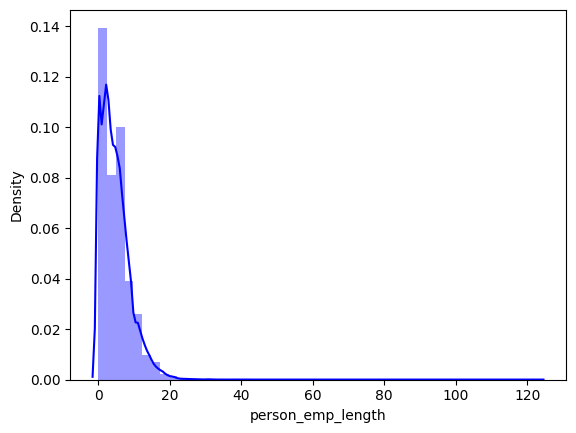

In [14]:
sns.distplot(df['person_emp_length'],kde=True,color='blue',bins=50)

In [15]:
df.fillna(df['person_emp_length'].median(),inplace=True)

In [16]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

/tmp/ipykernel_2369/2046825581.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'])


<Axes: xlabel='loan_amnt', ylabel='Density'>

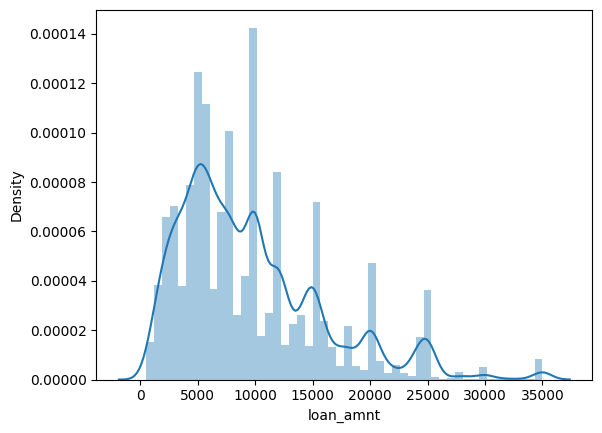

In [13]:
#sns.boxplot(y=df['loan_amnt'],x=df['loan_grade'])
#sns.boxplot(y=df['loan_amnt'],x=df['loan_status'])
df_loanstatus1 = df[df['loan_status'] == 1]
sns.distplot(df['loan_amnt'])
#plt.scatter(df['person_age'],df['person_income'])
#plt.xlabel('Age')
#plt.ylabel('Income')

Text(0, 0.5, 'loan amount')

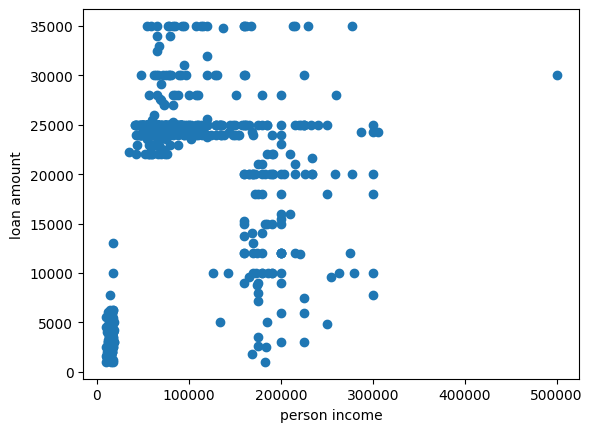

In [18]:
'''plt.scatter(df['loan_amnt'],df['person_income'])
plt.xlabel('loan amount')
plt.ylabel('person income')'''
df1 = df.iloc[0:500]
plt.scatter(df1['person_income'],df1['loan_amnt'])
plt.xlabel('person income')
plt.ylabel('loan amount')

Text(0, 0.5, 'loan_amnt')

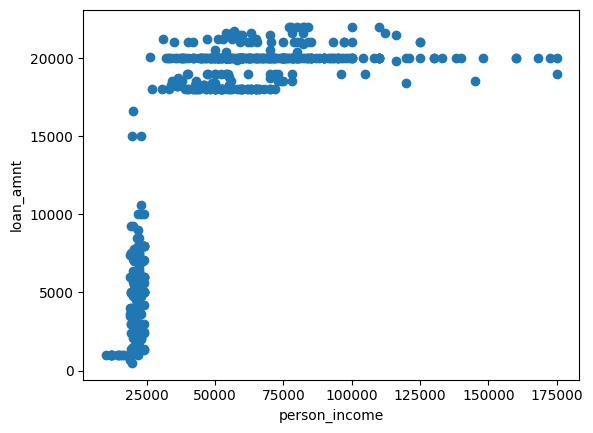

In [55]:
df2 = df.iloc[500:1000]
plt.scatter(df2['person_income'],df2['loan_amnt'],)
plt.xlabel('person_income')
plt.ylabel('loan_amnt')

In [60]:
encoded_df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])

KeyError: "None of [Index(['person_home_ownership', 'loan_intent', 'loan_grade',\n       'cb_person_default_on_file'],\n      dtype='object')] are in the [columns]"

In [79]:
def one_hot_encode(df,categorical_columns):
    for col in categorical_columns:
        unique_values = df[col].unique()
        for unique_value in unique_values:
            print(unique_value)
            new_col_name = f'{col}_{unique_value}'
            df[new_col_name] = (df[col] == unique_value).astype(int)
        df.drop(columns=col,inplace=True)
    return df
cat_col = [col for col in df.columns if df[col].dtype =='object']
df_new = one_hot_encode(df,cat_col)
df_new.head()
#df_new.columns

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_RENT,person_home_ownership_OWN,...,loan_intent_DEBTCONSOLIDATION,loan_grade_D,loan_grade_B,loan_grade_C,loan_grade_A,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,cb_person_default_on_file_N
0,22,59000,123.0,35000,16.02,1,0.59,3,1,0,...,0,1,0,0,0,0,0,0,1,0
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,1,0,0,0,0,0,0,1
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,0,0,0,1,0,0,0,0,0,1
3,23,65500,4.0,35000,15.23,1,0.53,2,1,0,...,0,0,0,1,0,0,0,0,0,1
4,24,54400,8.0,35000,14.27,1,0.55,4,1,0,...,0,0,0,1,0,0,0,0,1,0


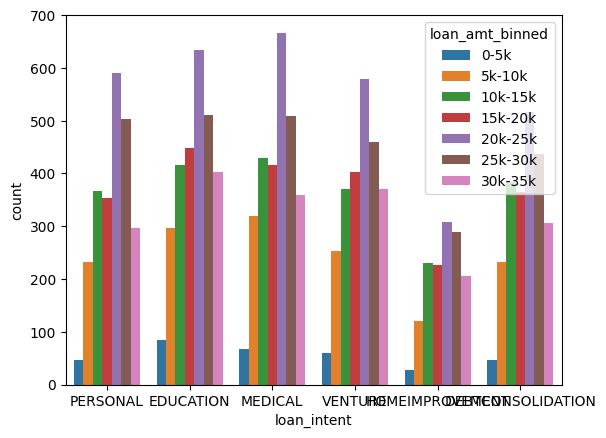

<Figure size 700000x5000 with 0 Axes>

In [30]:
labels = ['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']
bins = [0,1000,2000,3000,4000,5000,6000,7000]
df['loan_amt_binned'] = pd.cut(df['loan_amnt'],bins=bins,labels=labels,include_lowest=True)
#bivariate distr
sns.countplot(data=df,x='loan_intent',hue='loan_amt_binned')
plt.figure(figsize=(7000,50))
plt.show()

In [63]:
encoded_df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y',
       'loan_amt_binned'],
      dtype='object')

/tmp/ipykernel_718/3114422480.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['person_age'])


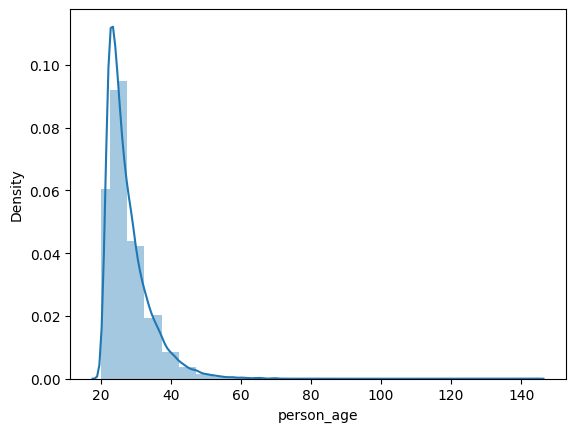

In [18]:
#distribution of age
sns.distplot(df['person_age'])
plt.show()

In [28]:
df['person_income'].describe()
#sns.barplot(x=df['person_age'],y=df['person_income'],hue=df['cb_person_default_on_file'])
#plt.xticks(rotation=45)
#plt.show()

count    3.258100e+04
mean     6.607485e+04
std      6.198312e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      6.000000e+06
Name: person_income, dtype: float64

In [19]:
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000]
labels = ['0-50k','50k-100k','100k-150k','150k-200k','200k-250k','250k-300k','300k-350k','350k-400k','400-450k',
          '450k-500k','500k-550k','550k-600k','600k-650k','650k-700k']
df_income = pd.cut(df['person_income'],bins=bins,labels=labels)


In [56]:
batch_data = df.sample(n=1000)
#dependent and independent
X = batch_data[['loan_grade','cb_person_default_on_file']].values
Y = batch_data['loan_status'].values
#split train test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0,shuffle=True)
print("Dimensions of original X training data {}".format(X_train.shape))
print("Dimensions of original X testing data {}".format(X_test.shape))
from sklearn.preprocessing import OneHotEncoder
#create OneHotEncoder object
ohe = OneHotEncoder() 
X_train_new = ohe.fit_transform(X_train).toarray()
X_test_new = ohe.fit_transform(X_test).toarray()
print(X_train_new.shape)
print(X_test_new.shape)
X_train_subset0=[]
counter=0
for i in range(len(X_train_new)):
    if(X_train_new[i][X_train_new.shape[1]-1] == 0):
        counter = counter+1
        if counter == 6:
            break
        subset=[]
        for j in range(X_train_new.shape[1]):
            subset.append(X_train_new[i][j])
        X_train_subset0.append(subset)
#print(X_train_subset0)
X_train_subset1=[]
counter=0
for i in range(len(X_train_new)):
    if(X_train_new[i][X_train_new.shape[1]-1] == 1):
        counter = counter+1
        if counter == 6:
            break
        subset=[]
        for j in range(X_train_new.shape[1]):
            subset.append(X_train_new[i][j])
        X_train_subset1.append(subset)
#print(X_train_subset1)
#print(X_train_subset0)
X_train_subset = np.vstack((X_train_subset0,X_train_subset1))
#X_train_subset = X_train_subset[:,0:8]

X_test_subset0=[]
counter=0
for i in range(len(X_test_new)):
    if(X_test_new[i][X_test_new.shape[1]-1] == 0):
        counter = counter+1
        if counter == 6:
            break
        subset=[]
        for j in range(X_test_new.shape[1]):
            subset.append(X_test_new[i][j])
        X_test_subset0.append(subset)
X_test_subset1=[]
counter=0
for i in range(len(X_test_new)):
    if(X_test_new[i][X_test_new.shape[1]-1] == 0):
        counter = counter+1
        if counter == 6:
            break
        subset=[]
        for j in range(X_test_new.shape[1]):
            subset.append(X_test_new[i][j])
        X_test_subset1.append(subset)
X_test_subset = np.vstack((X_test_subset0,X_test_subset1))
#print(X_test_subset.shape)

Y_train_subset0=[]
counter=0
for i in range(len(Y_train)):
    if(Y_train[i] == 0):
        counter = counter+1
        if counter == 6:
            break
        Y_train_subset0.append(Y_train[i])
#print(Y_train_subset0)
Y_train_subset1=[]
counter=0
for i in range(len(Y_train)):
    if(Y_train[i] == 1):
        counter = counter+1
        if counter == 6:
            break
        Y_train_subset1.append(Y_train[i])
Y_train_subset = np.vstack((Y_train_subset0,Y_train_subset1)).reshape(-1,1)

clf = DecisionTreeClassifier(random_state=1)
#train model on subsets of class label 0 and class label 1
clf.fit(X_train_subset,Y_train_subset)
loan_status = clf.predict(X_test_subset)
#print(X_test_subset.shape)
#when loan_grad is A is loan_status 0
#X_new_data = np.array([1.,0.,0.,0.,0.,0.,0.,0.,1.]).reshape(-1,1)
#loan_status_new_data = clf.predict(X_new_data)
#print(loan_status_new_data)
#from sklearn.metrics import accuracy_score
#print('Model with prediction accuracy: {0:0.4f}'.format(accuracy_score(Y_test,y_pred)))

Dimensions of original X training data (800, 2)
Dimensions of original X testing data (200, 2)
(800, 9)
(200, 9)


[Text(0.7205882352941176, 0.9375, 'loan_grade_D <= 0.5\ngini = 0.347\nsamples = 800\nvalue = [621, 179]\nclass = 0'),
 Text(0.5588235294117647, 0.8125, 'loan_grade_E <= 0.5\ngini = 0.301\nsamples = 709\nvalue = [578, 131]\nclass = 0'),
 Text(0.6397058823529411, 0.875, 'True  '),
 Text(0.4117647058823529, 0.6875, 'loan_grade_F <= 0.5\ngini = 0.28\nsamples = 688\nvalue = [572, 116]\nclass = 0'),
 Text(0.29411764705882354, 0.5625, 'loan_grade_G <= 0.5\ngini = 0.274\nsamples = 683\nvalue = [571, 112]\nclass = 0'),
 Text(0.23529411764705882, 0.4375, 'loan_grade_A <= 0.5\ngini = 0.271\nsamples = 681\nvalue = [571, 110]\nclass = 0'),
 Text(0.17647058823529413, 0.3125, 'loan_grade_B <= 0.5\ngini = 0.305\nsamples = 404\nvalue = [328, 76]\nclass = 0'),
 Text(0.11764705882352941, 0.1875, 'cb_person_default_on_file_N <= 0.5\ngini = 0.341\nsamples = 165\nvalue = [129, 36]\nclass = 0'),
 Text(0.058823529411764705, 0.0625, 'gini = 0.323\nsamples = 69\nvalue = [55, 14]\nclass = 0'),
 Text(0.1764705882

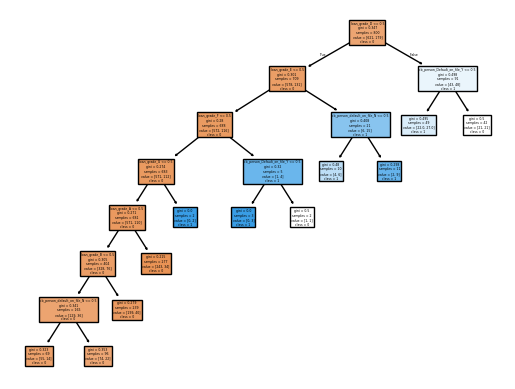

In [55]:
from sklearn.preprocessing import OneHotEncoder
#create OneHotEncoder object
ohe = OneHotEncoder() 
#encoding categorical variables by fit and transform
X_train_new = ohe.fit_transform(X_train[:,0:2]).toarray()
X_test_new = ohe.fit_transform(X_test[:,0:2]).toarray()
#encoding categorical variables by fit and transform
X_train_new = ohe.fit_transform(X_train[:,0:2]).toarray()
X_test_new = ohe.fit_transform(X_test[:,0:2]).toarray()
#print(X_train_new.shape)
#print(X_test_new.shape)
#print(X_test_new[0])
#print(Y_test[0])
#X_train_n = X_train_new[0:50,:]
#Y_train_n = Y_train[5:10].reshape(-1,1)
#train model on loan_grade,cb_person_default_on_file
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train_new,Y_train)
from sklearn.tree import plot_tree
plot_tree(clf,feature_names=['loan_grade_A','loan_grade_B','loan_grade_C',
                             'loan_grade_D','loan_grade_E','loan_grade_F',
                            'loan_grade_G','cb_person_Default_on_file_Y','cb_person_default_on_file_N'],class_names=['0','1'],filled=True)

#predict loan_status
#y_pred = clf.predict(X_test_new[0])
#print(y_pred)


#X_new = [[0., 0., 0., 0., 1., 0., 0., 1., 0.]]
#y_pred_new = clf.predict(X_new)
#print(y_pred_new)